# Sprint 機械学習スクラッチ ロジスティック回帰

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。


g
(
z
)
=
1
1
+
e
−
z
.

線形回帰の仮定関数は次の式でした。


h
θ
(
x
)
=
θ
T
⋅
x
.

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。


h
θ
(
x
)
=
1
1
+
e
−
θ
T
⋅
x
.

$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
np.random.seed(0)
X_array = np.arange(10).reshape(5, 2)
y_array = np.array([0, 1, 1, 0, 1])
X_val = np.random.randint(1, 10, size=(5, 2))
y_val = np.array([1, 1, 1, 0, 1])

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


θ
j
:=
θ
j
−
α
∂
J
(
θ
)
∂
θ
j
<
b
r
/
>
∂
J
(
θ
)
∂
θ
0
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
,
j
=
0
<
b
r
/
>
∂
J
(
θ
)
∂
θ
j
=
(
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
)
+
λ
m
θ
j
　
,
j
≥
1

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [47]:
scr_lr = ScratchLogisticRegression(num_iter=100, 
                                   lr=0.01,
                                   no_bias=False, 
                                   verbose=True)

scr_lr.fit(X_array, y_array, X_val, y_val)

iter0:[loss]:5.9004552264422045
iter0:[val_loss]:4.285495337514118
iter1:[loss]:5.69335085304963
iter1:[val_loss]:4.115022459993902
iter2:[loss]:5.49050063873554
iter2:[val_loss]:3.9487202901630853
iter3:[loss]:5.291884889101377
iter3:[val_loss]:3.786568421778123
iter4:[loss]:5.0974845165482225
iter4:[val_loss]:3.628546944923785
iter5:[loss]:4.9072811156291625
iter5:[val_loss]:3.474636503847294
iter6:[loss]:4.721257052064049
iter6:[val_loss]:3.324818365152388
iter7:[loss]:4.5393955682715115
iter7:[val_loss]:3.1790744984876413
iter8:[loss]:4.361680908894971
iter8:[val_loss]:3.0373876723259574
iter9:[loss]:4.18809847066041
iter9:[val_loss]:2.8997415680455365
iter10:[loss]:4.018634981845455
iter10:[val_loss]:2.7661209162126172
iter11:[loss]:3.8532787179168873
iter11:[val_loss]:2.6365116598647225
iter12:[loss]:3.6920197613403243
iter12:[val_loss]:2.5109011506197723
iter13:[loss]:3.5348503154215845
iter13:[val_loss]:2.389278384711229
iter14:[loss]:3.3817650841938196
iter14:[val_loss]:2.2716

In [42]:
scr_lr.predict_proba(X_val)

array([[0.79308855],
       [0.73492387],
       [0.66726831],
       [0.59193292],
       [0.5120146 ]])

In [43]:
scr_lr.predict(X_val)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [69]:
# sklearn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_array, y_array)
lr_pred = lr.predict(X_val)
lr_pred_proba = lr.predict_proba(X_val)

In [70]:
lr_pred_proba

array([[0.32945509, 0.67054491],
       [0.37662296, 0.62337704],
       [0.26119073, 0.73880927],
       [0.32050569, 0.67949431],
       [0.32750885, 0.67249115]])

In [93]:
x = np.random.randint(1,100, size=(6, 3))
t = np.random.randn(3)
xt = np.dot(x, t.T)

np.exp(xt)
1 / (1 + np.exp(-xt))

array([1.65469057e-20, 9.98807476e-01, 5.67469031e-20, 1.40392284e-05,
       2.20900979e-14, 9.99985781e-01])

In [87]:
np.random.seed(0)
np.random.randn(5)

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

In [94]:
x

array([[56, 29, 35],
       [ 1,  1, 37],
       [54,  6, 39],
       [18, 80,  5],
       [43, 59, 32],
       [ 2, 66, 42]])

In [95]:
t

array([-0.97727788,  0.06731083,  0.20649884])

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [48]:
from sklearn.datasets import load_iris

#データのダウンロードとXとY変数に代入
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

df_Y = pd.DataFrame(iris.target)
df_Y.columns = ["Species"]

# データ結合 concat（axis=1）で列に配合
df_0 = pd.concat((df_X, df_Y), axis=1)

# virgicolorとvirginica sepal_lengthとpetal_lengthに再構築する
df = df_0.iloc[50:, :].reset_index()
df = df.drop("index", axis=1)
display(df.head())
display(df.tail())

# 前処理
df = df.replace({'Species': {1: 0}})
display(df.head())

df = df.replace({'Species': {2: 1}})
display(df.tail())

,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


In [49]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(75, 4)
(25, 4)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

In [82]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # 訓練データ・学習データのインスタンス変数化
        self.X, self.y, self.X_val, self.y_val, self.theta = self._setting(X, y, X_val, y_val)       
        
        for i in range(self.iter):
            self.linear_hypo = self._linear_hypothesis(self.X)
            #print("linear_hypothetis", self.linear_hypo)
            #print("linear_hypothetis.shape", self.linear_hypo.shape)
            
            self.grad = self._gradient_descent(self.X, self.y)
            #print("[theta]", self.grad)
            #print("[theta].shape", self.grad.shape)
            
            self.predict_prob = self.predict_proba(self.X)
            #print("[predict_prob]", self.predict_prob)
            
            self.loss[i] = self.loss_func(self.y)
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("iter{}:[loss]:{}".format(i, self.loss[i]))
                
                if X_val is not None and y_val is not None:
                    self.val_predict_prob = self.predict_proba(self.X_val)
                    self.val_loss[i] = self.val_loss_func(self.y_val)
                    print("iter{}:[val_loss]:{}".format(i, self.val_loss[i]))

    def _setting(self, X, y, X_val, y_val):       
        X_copy = np.copy(X)
        y_copy = np.copy(y)
        
        if X_val is not None and y_val is not None:
            X_val_copy = np.copy(X_val)
            y_val_copy = np.copy(y_val)
                
        if self.no_bias == False:
            X_ones = np.ones(X.shape[0]).reshape(-1, 1)
            X_val_ones = np.ones(X_val.shape[0]).reshape(-1, 1)                
            X_copy = np.hstack((X_ones, X_copy))
            X_val_copy = np.hstack((X_val_ones, X_val_copy))
            np.random.seed(0)
            theta = np.random.randn(X.shape[1] + 1)
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

        else:
            np.random.seed(0)
            theta = np.random.randn(X.shape[1])
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pred = self.predict_proba(X).round()
        
        return pred

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pred_pro = self._linear_hypothesis(X)
        
        #if hypo.ndim == 1:
            # Workaround for multi_class="multinomial" and binary outcomes
            # which requires softmax prediction with only a 1D decision.
            #hypo_2d = np.c_[-hypo, hypo]
        #else:
            #hypo_2d = hypo
        
        #print("testestestes")
        
        return pred_pro
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        g = np.dot(self.X, self.theta.T).reshape(-1, 1)
        hypo = 1/ (1 + np.exp(-g))

        return hypo

    def _gradient_descent(self, X, y, lamda=1, alpha=0.01, error=0):
        """
        最急降下法

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        alpha：学習率

        lamda：正則化パラメータ

        Returns
        -------

        """
        m = len(y)

        grad = np.dot(self.X.T,(self.linear_hypo - y)) / m
        #print(grad)
        #print(grad.shape)

        if self.no_bias == False:
            delta_theta = grad[:, 1:] + lamda*self.theta.reshape(-1,1) /(m-1)
            #print(grad[:, 0])
            #print(delta_theta)
            
            delta_theta = np.hstack([grad[:, 0].reshape(-1, 1), delta_theta])

        else:
            delta_theta = grad + lamda*self.theta/m
        
        grad_average = np.average(delta_theta, axis=1)
        self.theta = self.theta - alpha*grad_average

        return self.theta

    def loss_func(self, y, lamda=1):
        """
        損失関数の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples,)
        訓練データまたはテストデータ

        Returns
        ----------
        """
        m = len(y)
        loss = np.average((-y*np.log(self.predict_prob)) - ((1-y)*np.log(1-self.predict_prob))) + lamda*(self.theta[1:]**2).sum() / 2*m
        
        return loss
    
    def val_loss_func(self, y, lamda=1):
        """
        損失関数の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples,)
        テストデータ用

        Returns
        ----------
        """
        m = len(y)
        val_loss = np.average((-y*np.log(self.predict_prob)) - ((1-y)*np.log(1-self.predict_prob))) + lamda*(self.theta[1:]**2).sum() / 2*m
        return val_loss
        

In [83]:
scr_lr_iris = ScratchLogisticRegression(num_iter=30, 
                                   lr=0.01,
                                   no_bias=False, 
                                   verbose=True)

scr_lr_iris.fit(X_train_scaler, y_train, X_test_scaler, y_train)

iter0:[loss]:361.76662480458754
iter0:[val_loss]:361.76662480458754
iter1:[loss]:360.32600186454226
iter1:[val_loss]:360.32600186454226
iter2:[loss]:358.889318617716
iter2:[val_loss]:358.889318617716
iter3:[loss]:357.456572937336
iter3:[val_loss]:357.456572937336
iter4:[loss]:356.02776268921195
iter4:[val_loss]:356.02776268921195
iter5:[loss]:354.6028857316513
iter5:[val_loss]:354.6028857316513
iter6:[loss]:353.1819399153721
iter6:[val_loss]:353.1819399153721
iter7:[loss]:351.7649230834162
iter7:[val_loss]:351.7649230834162
iter8:[loss]:350.35183307106297
iter8:[val_loss]:350.35183307106297
iter9:[loss]:348.9426677057384
iter9:[val_loss]:348.9426677057384
iter10:[loss]:347.53742480692785
iter10:[val_loss]:347.53742480692785
iter11:[loss]:346.13610218608477
iter11:[val_loss]:346.13610218608477
iter12:[loss]:344.7386976465395
iter12:[val_loss]:344.7386976465395
iter13:[loss]:343.3452089834079
iter13:[val_loss]:343.3452089834079
iter14:[loss]:341.95563398349793
iter14:[val_loss]:341.95563

In [84]:
scr_proba = scr_lr_iris.predict_proba(X_test_scaler)
scr_predict = scr_lr_iris.predict(X_test_scaler)

In [72]:
scr_lr_iris.predict_proba(X_train_scaler)

ValueError: shapes (75,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

In [56]:
scr_predict

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [57]:
# sklearn
from sklearn.linear_model import LogisticRegression

lr_iris = LogisticRegression(random_state=0)
lr_iris.fit(X_train_scaler, y_train)
lr_iris_pred = lr_iris.predict(X_test_scaler)
lr_iris_pred_proba = lr_iris.predict_proba(X_test_scaler)

In [58]:
lr_iris_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

In [60]:
lr_iris_pred_proba[:, 1]

array([2.19339321e-01, 9.38119682e-01, 2.50705273e-01, 9.74037431e-01,
       9.97998535e-01, 7.98496612e-04, 1.24052129e-01, 9.97375339e-01,
       4.95952567e-01, 1.44449108e-02, 9.04292353e-01, 9.10533751e-01,
       8.99333792e-01, 1.55132817e-01, 1.45113504e-03, 9.20892142e-03,
       5.23138209e-01, 3.45412504e-02, 6.84375599e-01, 7.68830012e-02,
       1.74226568e-03, 9.99905484e-01, 4.83117123e-02, 9.74263960e-01,
       9.91748064e-01])

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

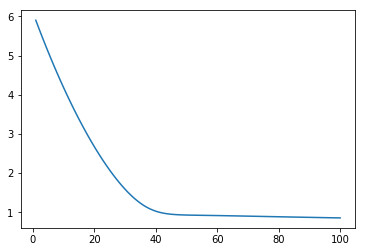

In [61]:
# 損失関数の描画
xlines = np.arange(1, len(scr_lr.loss) + 1)

plt.plot(xlines, scr_lr.loss)

plt.show()

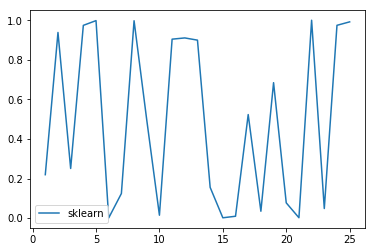

In [62]:
# sklearnのprobabilityの描画
xline = np.arange(1, len(lr_iris_pred_proba) + 1)

plt.plot(xline, lr_iris_pred_proba[:, 1], label="sklearn")

plt.legend()
plt.show()

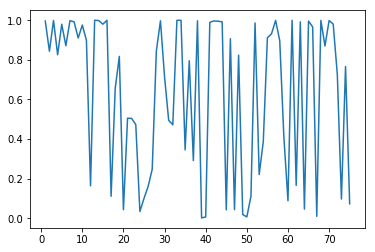

In [67]:
# スクラッチのprobabilityの描画
xline = np.arange(1, 76)

plt.plot(xline, scr_proba)

plt.show()

## 【問題7】決定領域の可視化
決定領域を可視化してください。

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。